In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
# Set the path to the file you'd like to load
file_path = "spam.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/sms-spam-collection-dataset",
  file_path,
  pandas_kwargs={"encoding": "latin-1"}
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

e:\Code\Learning\ML\sms-spam-classifier\sms-spam-classifier-practice-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\abhij\AppData\Local\Temp\ipykernel_19064\4037549679.py:7: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df[df['Unnamed: 2'].notnull()].head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN


In [8]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

In [10]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# convert lable value ham to 0 and spam to 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [13]:
df.duplicated(keep=False)

0       False
1       False
2        True
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [14]:
df_cleaned = df.drop_duplicates(keep='first')
df_cleaned

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
label_counts = df['label'].value_counts()
label_counts

label
0    4825
1     747
Name: count, dtype: int64

C:\Users\abhij\AppData\Local\Temp\ipykernel_19064\1822862543.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='viridis')


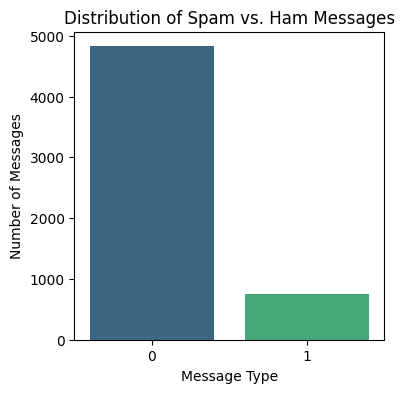

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='label', palette='viridis')
plt.title('Distribution of Spam vs. Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Number of Messages')
plt.show()

In [17]:
df['number_of_characters'] = df['text'].str.len()
df.head()

,label,text,number_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
import nltk
nltk.download('punkt_tab')
df['word_count'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abhij\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [19]:
df.head()

,label,text,number_of_characters,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
df['sentence_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,label,text,number_of_characters,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


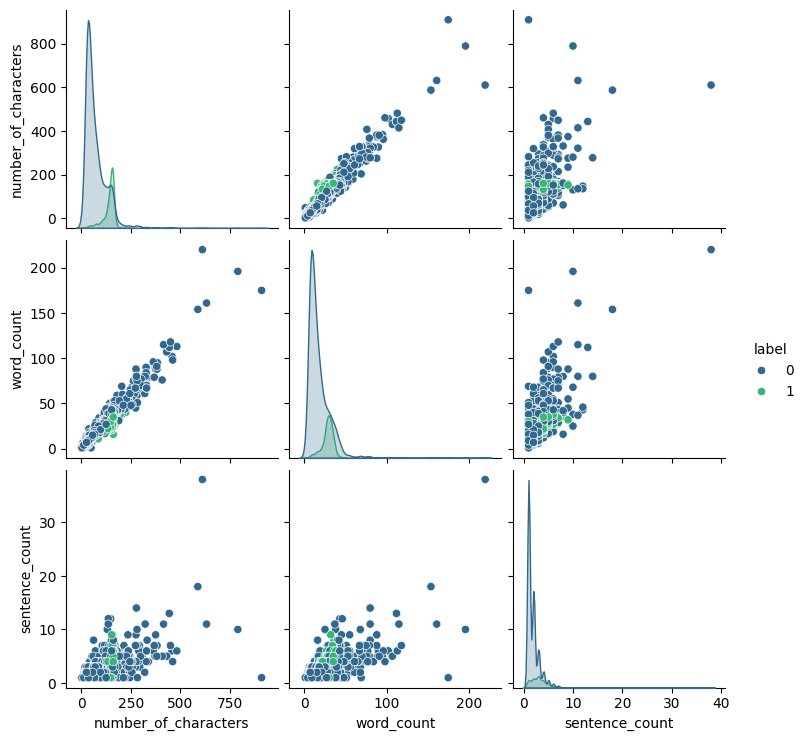

In [21]:
sns.pairplot(df, hue='label', palette='viridis')

<Axes: >

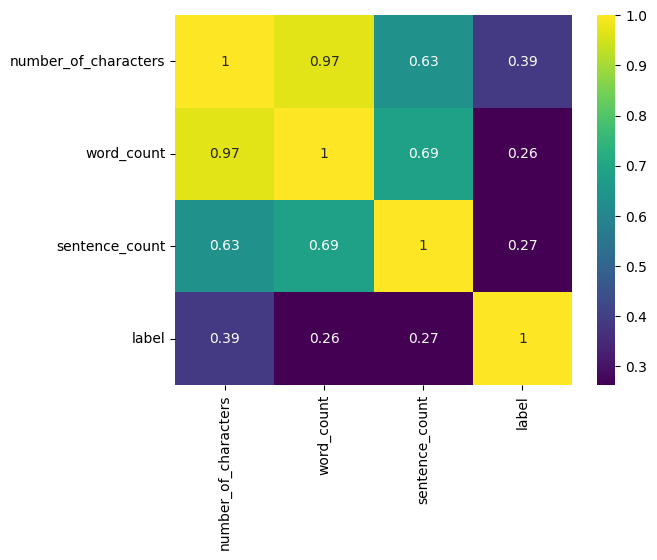

In [22]:
sns.heatmap(df[['number_of_characters', 'word_count', 'sentence_count','label']].corr(), annot=True, cmap='viridis')

In [23]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text: str)->str:
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [ps.stem(word) for word in text if word.isalnum() and word not in stopwords.words('english') and word not in string.punctuation]
    return " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhij\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,label,text,number_of_characters,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [25]:
spam_word = [word for sent in df[df['label'] == 1]['transformed_text'].tolist() for word in sent.split(' ')]
ham_word = [word for sent in df[df['label'] == 0]['transformed_text'].tolist() for word in sent.split(' ')]

In [26]:
from collections import Counter

ham_word_count = Counter(ham_word)
ham_word_count.most_common(10)

[('u', 979),
 ('go', 417),
 ('get', 357),
 ('gt', 318),
 ('lt', 316),
 ('2', 300),
 ('come', 295),
 ('call', 291),
 ('know', 248),
 ('ok', 245)]

In [27]:
spam_word_count = Counter(spam_word)
spam_word_count.most_common(10)

[('call', 365),
 ('free', 219),
 ('2', 174),
 ('txt', 169),
 ('ur', 144),
 ('u', 141),
 ('text', 139),
 ('mobil', 135),
 ('4', 120),
 ('claim', 115)]

In [28]:
import pandas as pd
pd.DataFrame(spam_word_count.most_common(10))

,0,1
0,call,365
1,free,219
2,2,174
3,txt,169
4,ur,144
5,u,141
6,text,139
7,mobil,135
8,4,120
9,claim,115


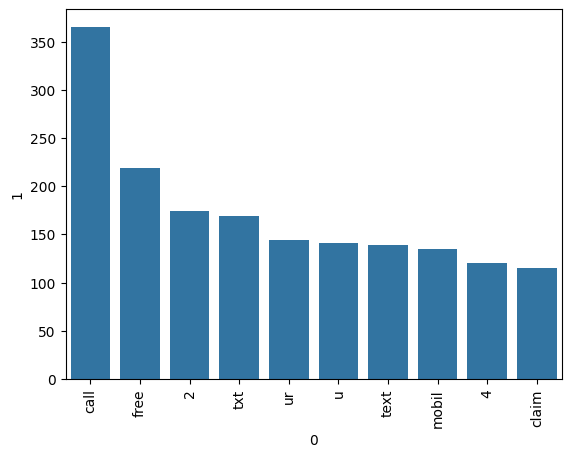

In [29]:
sns.barplot(x=pd.DataFrame(spam_word_count.most_common(10))[0], y=pd.DataFrame(spam_word_count.most_common(10))[1])
plt.xticks(rotation='vertical')
plt.show()

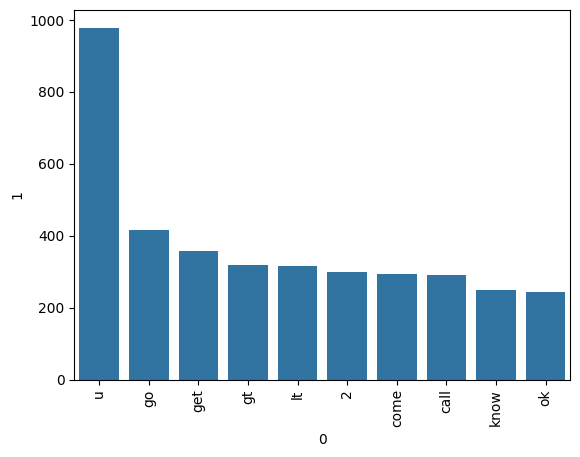

In [30]:
sns.barplot(x=pd.DataFrame(ham_word_count.most_common(10))[0], y=pd.DataFrame(ham_word_count.most_common(10))[1])
plt.xticks(rotation='vertical')
plt.show()

In [31]:
type(df['transformed_text'])
data_list = ["HI How are you", "I'm fine", "I'm good"]
series_from_list = pd.Series(data_list)
type(series_from_list)

pandas.core.series.Series

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['transformed_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5572, 6708))

In [33]:
y = df['label'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)

In [36]:
print(confusion_matrix(y_test, gnb_y_pred))
print(precision_score(y_test, gnb_y_pred))
print(accuracy_score(y_test, gnb_y_pred))

[[826 139]
 [ 16 134]]
0.4908424908424908
0.8609865470852018


In [37]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_y_pred = mnb.predict(X_test)

In [38]:
print(confusion_matrix(y_test, mnb_y_pred))
print(precision_score(y_test, mnb_y_pred))
print(accuracy_score(y_test, mnb_y_pred))

[[946  19]
 [ 16 134]]
0.8758169934640523
0.968609865470852


In [39]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_y_pred = bnb.predict(X_test)

In [40]:
print(confusion_matrix(y_test, bnb_y_pred))
print(precision_score(y_test, bnb_y_pred))
print(accuracy_score(y_test, bnb_y_pred))

[[961   4]
 [ 32 118]]
0.9672131147540983
0.967713004484305


# Implementing TF-IDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
X = tv.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5572, 6708))

In [43]:
y = df['label'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)

print(confusion_matrix(y_test, gnb_y_pred))
print(precision_score(y_test, gnb_y_pred))
print(accuracy_score(y_test, gnb_y_pred))

[[826 139]
 [ 17 133]]
0.4889705882352941
0.8600896860986547


In [49]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_y_pred = mnb.predict(X_test)
print(confusion_matrix(y_test, mnb_y_pred))
print(precision_score(y_test, mnb_y_pred))
print(accuracy_score(y_test, mnb_y_pred))

[[965   0]
 [ 41 109]]
1.0
0.9632286995515695


In [50]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_y_pred = bnb.predict(X_test)
print(confusion_matrix(y_test, bnb_y_pred))
print(precision_score(y_test, bnb_y_pred))
print(accuracy_score(y_test, bnb_y_pred))

[[961   4]
 [ 32 118]]
0.9672131147540983
0.967713004484305


In [52]:
import pickle
pickle.dump(tv, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))